In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as ms
import plotly.express as px
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.porter import PorterStemmer
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import VotingClassifier
from collections import Counter
porter = PorterStemmer()
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [136]:
pd.options.mode.chained_assignment = None

In [137]:
dataf = pd.read_csv("/content/sentimentdataset.csv", nrows=733)
df = dataf[["Text"]]
df["Text"] = df["Text"].astype(str)
dataf.head()

,ID,Text,Sentiment (Label),Timestamp,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


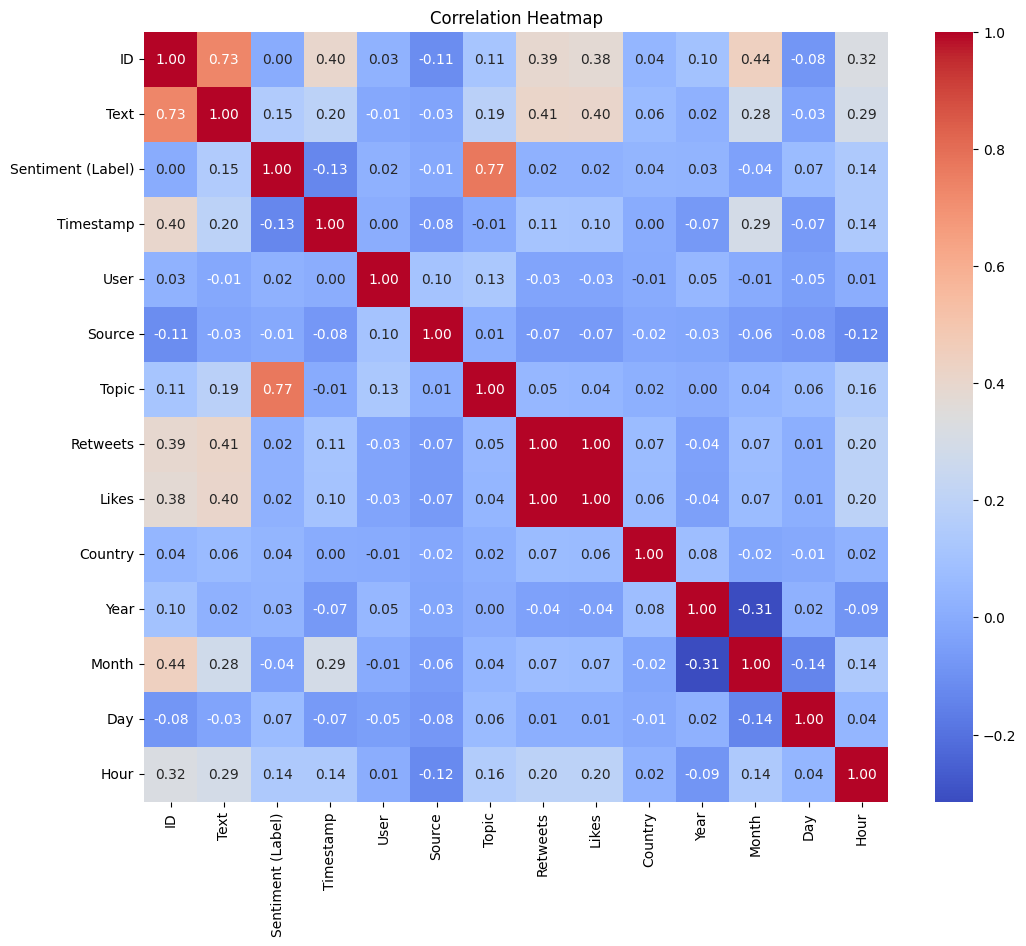

In [138]:
original_encodings = {}
label_encoder = LabelEncoder()
categorical_columns = ['Text', 'Sentiment (Label)','Topic','Source', 'Country','Timestamp','User']  # Replace with your categorical columns

for column in categorical_columns:
    label_encoder = LabelEncoder()
    dataf[column] = label_encoder.fit_transform(dataf[column])
    original_encodings[column] = label_encoder
correlation_matrix = dataf.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [139]:
#   for column in categorical_columns:
    label_encoder = original_encodings[column]
    dataf[column] = label_encoder.inverse_transform(dataf[column])

# print(dataf.head())

   ID                                               Text Sentiment (Label)  \
0   0   Enjoying a beautiful day at the park!        ...        Positive     
1   1   Traffic was terrible this morning.           ...        Negative     
2   2   Just finished an amazing workout! 💪          ...        Positive     
3   3   Excited about the upcoming weekend getaway!  ...        Positive     
4   4   Trying out a new recipe for dinner tonight.  ...        Neutral      

         Timestamp            User       Source  \
0  1/15/2023 12:30   User123          Twitter     
1   1/15/2023 8:45   CommuterX        Twitter     
2  1/15/2023 15:45   FitnessFan      Instagram    
3  1/15/2023 18:20   AdventureX       Facebook    
4  1/15/2023 19:55   ChefCook        Instagram    

                                        Topic  Retweets  Likes       Country  \
0   #Nature #Park                                    15     30     USA         
1   #Traffic #Morning                                 5     10  

In [140]:
# lower case
dataf = dataf.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
dataf.head()

,ID,Text,Sentiment (Label),Timestamp,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,enjoying a beautiful day at the park! ...,positive,1/15/2023 12:30,user123,twitter,#nature #park,15,30,usa,2023,1,15,12
1,1,traffic was terrible this morning. ...,negative,1/15/2023 8:45,commuterx,twitter,#traffic #morning,5,10,canada,2023,1,15,8
2,2,just finished an amazing workout! 💪 ...,positive,1/15/2023 15:45,fitnessfan,instagram,#fitness #workout,20,40,usa,2023,1,15,15
3,3,excited about the upcoming weekend getaway! ...,positive,1/15/2023 18:20,adventurex,facebook,#travel #adventure,8,15,uk,2023,1,15,18
4,4,trying out a new recipe for dinner tonight. ...,neutral,1/15/2023 19:55,chefcook,instagram,#cooking #food,12,25,australia,2023,1,15,19


In [141]:
# Define a function to remove punctuation from a string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
# Apply the remove_punctuation function to all columns in the DataFrame
dataf = dataf.applymap(lambda x: remove_punctuation(str(x)) if isinstance(x, str) else x)
dataf.head()

<ipython-input-141-8700989b624d>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataf = dataf.applymap(lambda x: remove_punctuation(str(x)) if isinstance(x, str) else x)


,ID,Text,Sentiment (Label),Timestamp,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,enjoying a beautiful day at the park ...,positive,1152023 1230,user123,twitter,nature park,15,30,usa,2023,1,15,12
1,1,traffic was terrible this morning ...,negative,1152023 845,commuterx,twitter,traffic morning,5,10,canada,2023,1,15,8
2,2,just finished an amazing workout 💪 ...,positive,1152023 1545,fitnessfan,instagram,fitness workout,20,40,usa,2023,1,15,15
3,3,excited about the upcoming weekend getaway ...,positive,1152023 1820,adventurex,facebook,travel adventure,8,15,uk,2023,1,15,18
4,4,trying out a new recipe for dinner tonight ...,neutral,1152023 1955,chefcook,instagram,cooking food,12,25,australia,2023,1,15,19


In [142]:
# Define a function to map labels to numerical values
def map_labels_to_numerical(labels):
    positive_labels = ["positive", "happiness", "joy", "love", "amusement", "enjoyment", "admiration", "affection", "awe", "surprise",
                       "acceptance", "adoration", "anticipation", "calmness", "excitement", "pride", "kind", "contentment", "serenity",
                       "gratitude", "hope", "compassion", "enthusiasm", "fulfillment", "elation", "euphoria", "inspiration", "optimism",
                       "reverence", "zest", "proud", "grateful", "empathetic", "compassionate", "playful", "free-spirited", "inspired",
                       "confident", "empowered", "hopeful", "playfuljoy", "mindfulness", "dreamchaser", "elegance", "whimsy", "harmony",
                       "creativity", "radiance", "wonder", "rejuvenation", "coziness", "adventure", "euphoria", "enchantment", "melodic",
                       "festivejoy", "innerjourney", "freedom", "dazzle", "artisticburst", "culinaryodyssey", "immersion", "spark",
                       "marvel", "heartwarming", "envisioning history", "imagination", "vibrancy", "mesmerizing", "winter magic",
                       "thrilling journey", "nature's beauty", "celestial wonder", "runway creativity", "ocean's freedom",
                       "whispers of the past", "adventure", "solace", "breakthrough", "joy in baking", "imagination", "thrill", "harmony",
                       "radiance", "wonder", "rejuvenation", "inspiration", "adventure", "euphoria", "enchantment", "nostalgia", "pride",
                       "touched", "gratitude", "contemplation", "satisfaction", "triumph", "heartwarming", "reflection", "hope",
                       "enthusiasm", "emotion", "connection", "iconic", "euphoria", "journey", "excitement", "engagement", "pride",
                       "creativity", "emotion", "pride", "journey", "excitement", "engagement", "pride", "touched", "gratitude",
                       "inspiration", "contemplation", "satisfaction", "triumph", "heartwarming", "reflection", "hope", "enthusiasm",
                       "emotion", "connection", "iconic", "euphoria", "journey", "excitement", "engagement", "pride", "creativity",
                       "emotion", "pride"]

    negative_labels = ["negative", "anger", "fear", "sadness", "disgust", "disappointed", "disappointment", "shame", "despair",
                       "grief", "loneliness", "jealousy", "resentment", "frustration", "bitterness", "anxiety", "helplessness",
                       "regret", "desolation", "isolation", "boredom", "curiosity", "indifference", "confusion", "numbness",
                       "melancholy", "nostalgia", "ambivalence", "fearful", "apprehensive", "overwhelmed", "devastated", "envious",
                       "dismissive", "yearning", "betrayal", "suffering", "heartbreak", "emotionalstorm", "exhaustion", "sorrow",
                       "darkness", "desperation", "ruins", "desolation", "loss", "helpless", "betrayed", "solitude", "lostlove"]

    # Convert labels to lowercase for case-insensitive matching
    labels = labels.lower().split()

    # Check if any label implies positive sentiment
    if any(label in positive_labels for label in labels):
        return 1
    # Check if any label implies negative sentiment
    elif any(label in negative_labels for label in labels):
        return -1
    else:
        return 0  # Neutral

dataf['Sentiment (Label)'] = dataf['Sentiment (Label)'].apply(map_labels_to_numerical)


In [143]:
#Removal of stopwords
stop_words = set(stopwords.words('english'))
columns_to_remove_stopwords = ['Text', 'Sentiment (Label)', 'Source', 'Topic', 'Country']
def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word.lower() not in stop_words])
for column in columns_to_remove_stopwords:
    dataf[column] = dataf[column].apply(remove_stopwords)
dataf.head()

,ID,Text,Sentiment (Label),Timestamp,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,enjoying beautiful day park,1,1152023 1230,user123,twitter,nature park,15,30,usa,2023,1,15,12
1,1,traffic terrible morning,-1,1152023 845,commuterx,twitter,traffic morning,5,10,canada,2023,1,15,8
2,2,finished amazing workout 💪,1,1152023 1545,fitnessfan,instagram,fitness workout,20,40,usa,2023,1,15,15
3,3,excited upcoming weekend getaway,1,1152023 1820,adventurex,facebook,travel adventure,8,15,uk,2023,1,15,18
4,4,trying new recipe dinner tonight,0,1152023 1955,chefcook,instagram,cooking food,12,25,australia,2023,1,15,19


First few rows of the dataset:
   ID                              Text Sentiment (Label)     Timestamp  \
0   0       enjoying beautiful day park                 1  1152023 1230   
1   1          traffic terrible morning                -1   1152023 845   
2   2        finished amazing workout 💪                 1  1152023 1545   
3   3  excited upcoming weekend getaway                 1  1152023 1820   
4   4  trying new recipe dinner tonight                 0  1152023 1955   

             User     Source             Topic  Retweets  Likes    Country  \
0   user123          twitter       nature park        15     30        usa   
1   commuterx        twitter   traffic morning         5     10     canada   
2   fitnessfan     instagram   fitness workout        20     40        usa   
3   adventurex      facebook  travel adventure         8     15         uk   
4   chefcook       instagram      cooking food        12     25  australia   

   Year  Month  Day  Hour  
0  2023      1   15  

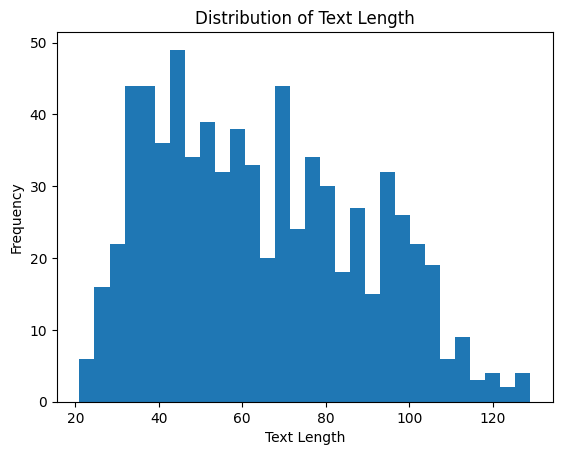

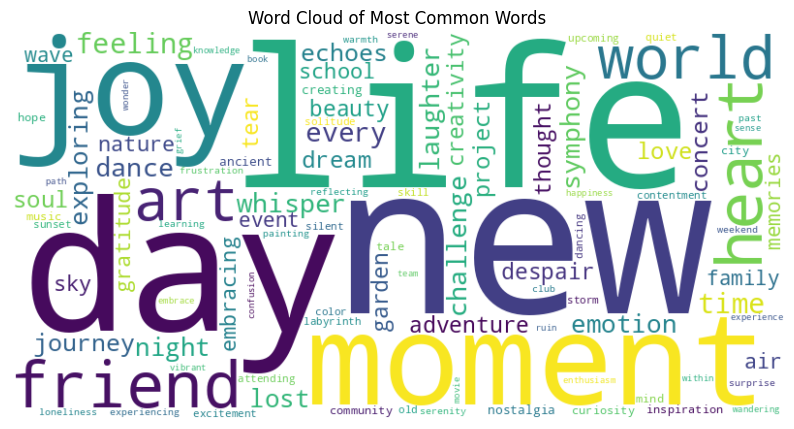

In [144]:
#Exploratory Data Analysis (EDA) technique
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(dataf.head())

# Basic statistics summary
print("\nBasic statistics summary:")
print(dataf.describe())

# Check for missing values
print("\nMissing values:")
print(dataf.isnull().sum())

# Check the distribution of text length
dataf['Text_Length'] = dataf['Text'].apply(len)
print("\nDistribution of text length:")
print(dataf['Text_Length'].describe())

# Visualize the distribution of text length (histogram)
import matplotlib.pyplot as plt
plt.hist(dataf['Text_Length'], bins=30)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

# Visualize the most common words (word cloud)
from wordcloud import WordCloud
all_text = ' '.join(dataf['Text'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()


In [145]:
# Define a dictionary of text normalization mappings
normalization_map = {
    'u': 'you',
    'ur': 'your',
    '2': 'to',
    '4': 'for',
    'b4': 'before',
    'gr8': 'great',
    'gud': 'good',
    'pls': 'please',
    'thx': 'thanks'
}

def normalize_text(text):
    words = text.split()
    normalized_words = [normalization_map[word] if word in normalization_map else word for word in words]
    normalized_text = ' '.join(normalized_words)
    return normalized_text
columns_to_normalize = ['Text', 'Sentiment (Label)', 'Topic']
for column in columns_to_normalize:
    dataf[column] = dataf[column].apply(normalize_text)

dataf.head()


,ID,Text,Sentiment (Label),Timestamp,User,Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour,Text_Length
0,0,enjoying beautiful day park,1,1152023 1230,user123,twitter,nature park,15,30,usa,2023,1,15,12,27
1,1,traffic terrible morning,-1,1152023 845,commuterx,twitter,traffic morning,5,10,canada,2023,1,15,8,24
2,2,finished amazing workout 💪,1,1152023 1545,fitnessfan,instagram,fitness workout,20,40,usa,2023,1,15,15,26
3,3,excited upcoming weekend getaway,1,1152023 1820,adventurex,facebook,travel adventure,8,15,uk,2023,1,15,18,32
4,4,trying new recipe dinner tonight,0,1152023 1955,chefcook,instagram,cooking food,12,25,australia,2023,1,15,19,32


In [146]:
dataf = dataf.drop(columns=['Timestamp','User'])

In [147]:
import nltk
nltk.download('punkt_tab')
dataf['Text'] = dataf['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
dataf['Text'] = dataf['Text'].apply(lambda x: nltk.word_tokenize(x))
stop_words = set(stopwords.words('english'))
dataf['Text'] = dataf['Text'].apply(lambda x: [word for word in x if word not in stop_words])
lemmatizer = WordNetLemmatizer()
dataf['Text'] = dataf['Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
dataf['Text'] = dataf['Text'].apply(lambda x: ' '.join(x))


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [148]:
stemmer = PorterStemmer()
def stem_text(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(stemmed_tokens)
dataf['Text']= dataf['Text'].apply(stem_text)
dataf.head()

,ID,Text,Sentiment (Label),Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour,Text_Length
0,0,enjoy beauti day park,1,twitter,nature park,15,30,usa,2023,1,15,12,27
1,1,traffic terribl morn,-1,twitter,traffic morning,5,10,canada,2023,1,15,8,24
2,2,finish amaz workout,1,instagram,fitness workout,20,40,usa,2023,1,15,15,26
3,3,excit upcom weekend getaway,1,facebook,travel adventure,8,15,uk,2023,1,15,18,32
4,4,tri new recip dinner tonight,0,instagram,cooking food,12,25,australia,2023,1,15,19,32


In [149]:
#Stemming
"""stemmer = PorterStemmer()
def stem_text(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(stemmed_tokens)
dataf['Text']= dataf['Text'].apply(stem_text)
dataf['Topic']= dataf['Topic'].apply(stem_text)
dataf.head()"""

"stemmer = PorterStemmer()\ndef stem_text(text):\n    tokens = text.split()\n    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]\n    return ' '.join(stemmed_tokens)\ndataf['Text']= dataf['Text'].apply(stem_text)\ndataf['Topic']= dataf['Topic'].apply(stem_text)\ndataf.head()"

In [150]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):

    # Tokenize the input text into words
    word_list = word_tokenize(text)
    # Lemmatize each word
    return [lemmatizer.lemmatize(word) for word in word_list]

# Assuming 'dataf' is your DataFrame containing lemmatized words in specified columns
# Assuming 'lemmatizer' and 'lemmatize_words' functions are defined as mentioned

columns_to_lemmatize = ['Text', 'Sentiment (Label)', 'Topic']
for column in columns_to_lemmatize:
    dataf[column] = dataf[column].apply(lemmatize_words)

# Joining function to join lemmatized words back into sentences or documents
def join_lemmatized_words(word_list):

    return ' '.join(word_list)

# Columns to join the lemmatized words back into sentences or documents
columns_to_join = ['Text', 'Sentiment (Label)', 'Topic']

# Applying the joining function to each specified column
for column in columns_to_join:
    dataf[column] = dataf[column].apply(join_lemmatized_words)

# Display the DataFrame after joining the lemmatized words
dataf.head()

,ID,Text,Sentiment (Label),Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour,Text_Length
0,0,enjoy beauti day park,1,twitter,nature park,15,30,usa,2023,1,15,12,27
1,1,traffic terribl morn,-1,twitter,traffic morning,5,10,canada,2023,1,15,8,24
2,2,finish amaz workout,1,instagram,fitness workout,20,40,usa,2023,1,15,15,26
3,3,excit upcom weekend getaway,1,facebook,travel adventure,8,15,uk,2023,1,15,18,32
4,4,tri new recip dinner tonight,0,instagram,cooking food,12,25,australia,2023,1,15,19,32


In [151]:
"""def join_tokens(tokens):
    return ' '.join(tokens)
columns_to_join = ['Text', 'Sentiment (Label)', 'Topic']
for column in columns_to_join:
    dataf[column] = dataf[column].apply(join_tokens)
dataf.head()"""

"def join_tokens(tokens):\n    return ' '.join(tokens)\ncolumns_to_join = ['Text', 'Sentiment (Label)', 'Topic']\nfor column in columns_to_join:\n    dataf[column] = dataf[column].apply(join_tokens)\ndataf.head()"

In [152]:
categorical_columns = ['Source', 'Country']  # Replace with your categorical columns

for column in categorical_columns:
    label_encoder = LabelEncoder()
    dataf[column] = label_encoder.fit_transform(dataf[column])
    original_encodings[column] = label_encoder

In [153]:
columns_to_convert = ['Text', 'Sentiment (Label)', 'Source', 'Topic', 'Country']
for column in columns_to_convert:
    dataf[column] = dataf[column].astype(str)
dataf.head()

,ID,Text,Sentiment (Label),Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour,Text_Length
0,0,enjoy beauti day park,1,2,nature park,15,30,32,2023,1,15,12,27
1,1,traffic terribl morn,-1,2,traffic morning,5,10,5,2023,1,15,8,24
2,2,finish amaz workout,1,1,fitness workout,20,40,32,2023,1,15,15,26
3,3,excit upcom weekend getaway,1,0,travel adventure,8,15,31,2023,1,15,18,32
4,4,tri new recip dinner tonight,0,1,cooking food,12,25,0,2023,1,15,19,32


In [154]:
from collections import Counter

# Concatenate all joined text into a single string
all_joined_text = ' '.join(dataf['Text'])

# Tokenize the concatenated text
tokens = all_joined_text.split()

# Count the frequency of each token
word_counts = Counter(tokens)

# Display the most common words and their frequencies
print("Most common words and their frequencies:")
for word, frequency in word_counts.most_common(20):
    print(f"{word}: {frequency}")


Most common words and their frequencies:
new: 43
life: 38
challeng: 34
joy: 31
danc: 30
day: 29
feel: 29
like: 28
dream: 28
moment: 27
emot: 27
friend: 26
heart: 26
explor: 25
echo: 25
beauti: 24
laughter: 24
embrac: 24
night: 23
hope: 23


In [155]:
"""from collections import Counter
cnt = Counter()
for text in dataf["Text"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)
frequent_words_to_remove= set([w for (w, wc) in cnt.most_common(10)])
def remove_frequent_words(text):
    return ' '.join([word for word in str(text).split() if word.lower() not in frequent_words_to_remove])

dataf["Text"] = dataf["Text"].apply(remove_frequent_words)
dataf.head()"""

'from collections import Counter\ncnt = Counter()\nfor text in dataf["Text"].values:\n    for word in text.split():\n        cnt[word] += 1\n\ncnt.most_common(10)\nfrequent_words_to_remove= set([w for (w, wc) in cnt.most_common(10)])\ndef remove_frequent_words(text):\n    return \' \'.join([word for word in str(text).split() if word.lower() not in frequent_words_to_remove])\n\ndataf["Text"] = dataf["Text"].apply(remove_frequent_words)\ndataf.head()'

In [156]:
# remove emojis from text
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
dataf['Text'] = dataf['Text'].apply(remove_emojis)
dataf['Sentiment (Label)'] = dataf['Sentiment (Label)'].apply(remove_emojis)
dataf['Text'] = dataf['Text'].apply(remove_emojis)
dataf.head(100)

,ID,Text,Sentiment (Label),Source,Topic,Retweets,Likes,Country,Year,Month,Day,Hour,Text_Length
0,0,enjoy beauti day park,1,2,nature park,15,30,32,2023,1,15,12,27
1,1,traffic terribl morn,-1,2,traffic morning,5,10,5,2023,1,15,8,24
2,2,finish amaz workout,1,1,fitness workout,20,40,32,2023,1,15,15,26
3,3,excit upcom weekend getaway,1,0,travel adventure,8,15,31,2023,1,15,18,32
4,4,tri new recip dinner tonight,0,1,cooking food,12,25,0,2023,1,15,19,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98,confus reign tri make sen recent event,-1,1,confusion makingsense,25,50,31,2023,2,27,14,45
96,99,excit build surpris birthday parti,1,0,excitement surpriseparty,22,45,5,2023,2,27,18,43
97,100,wit act kind made day,1,2,kindness actsofkindness,20,40,32,2023,2,28,11,31
98,101,pride complet challeng fit challeng,1,1,pride fitnesschallengecompleted,30,60,31,2023,2,28,16,46


In [157]:
def remove_outliers_zscore(dataf, column):
    z_scores = np.abs((dataf[column] - dataf[column].mean()) / dataf[column].std())
    threshold = 3
    outliers = df[z_scores > threshold]
    dataf = dataf[z_scores <= threshold]
    return df, outliers
# Call the function to remove outliers from the 'likes' column
data, outliers = remove_outliers_zscore(dataf, 'Likes')
data, outliers = remove_outliers_zscore(dataf, 'Retweets')

In [158]:
X_train, X_test, y_train, y_test = train_test_split(dataf['Text'], dataf['Sentiment (Label)'], test_size=0.2, random_state=0)

# Vectorize text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [159]:
"""X = dataf['Text']
count_vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_features=10000, ngram_range=(1, 2))
X_count_vectorized = count_vectorizer.fit_transform(X)
print("Vocabulary size:", len(count_vectorizer.vocabulary_))"""

'X = dataf[\'Text\']\ncount_vectorizer = CountVectorizer(lowercase=True, stop_words=\'english\', max_features=10000, ngram_range=(1, 2))\nX_count_vectorized = count_vectorizer.fit_transform(X)\nprint("Vocabulary size:", len(count_vectorizer.vocabulary_))'

In [160]:
"""
X = dataf['Text']
y = dataf['Sentiment (Label)']

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Print the vocabulary size (number of unique words in the corpus)
print("Vocabulary size:", len(tfidf_vectorizer.vocabulary_))
"""

'\nX = dataf[\'Text\']\ny = dataf[\'Sentiment (Label)\']\n\n# Vectorize text data using TF-IDF\ntfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words=\'english\', max_features=10000, ngram_range=(1, 2))\nX_tfidf = tfidf_vectorizer.fit_transform(X)\n\n# Print the vocabulary size (number of unique words in the corpus)\nprint("Vocabulary size:", len(tfidf_vectorizer.vocabulary_))\n'

In [161]:
"""from gensim.models import Word2Vec

X = dataf['Text']

# Tokenize the text data
tokenized_text = X.apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Get Word2Vec embeddings for each word in the vocabulary
word_vectors = word2vec_model.wv

# Print the size of the vocabulary (number of unique words)
print("Vocabulary size:", len(word_vectors))"""

'from gensim.models import Word2Vec\n\nX = dataf[\'Text\']\n\n# Tokenize the text data\ntokenized_text = X.apply(lambda x: x.split())\n\n# Train Word2Vec model\nword2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)\n\n# Get Word2Vec embeddings for each word in the vocabulary\nword_vectors = word2vec_model.wv\n\n# Print the size of the vocabulary (number of unique words)\nprint("Vocabulary size:", len(word_vectors))'

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

X = dataf['Text']
y = dataf['Sentiment (Label)']

# Vectorize text data using TF-IDF for better feature representation
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Handle class imbalances using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_tfidf, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train SVM model with hyperparameter tuning using GridSearchCV
svm_param_grid = {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_

# Predictions on training data
y_pred_train = best_svm_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)

# Predictions on test data
y_pred_svm = best_svm_model.predict(X_test)

print("SVM accuracy (train):", train_accuracy)
print("SVM accuracy (test):", accuracy_score(y_test, y_pred_svm))

# Print the full classification report
print("SVM classification report:\n", classification_report(y_test, y_pred_svm))

joblib.dump(best_svm_model, 'best_svm_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


SVM accuracy (train): 1.0
SVM accuracy (test): 0.9102040816326531
SVM classification report:
               precision    recall  f1-score   support

          -1       1.00      0.94      0.97        90
           0       0.93      0.84      0.88        82
           1       0.80      0.95      0.87        73

    accuracy                           0.91       245
   macro avg       0.91      0.91      0.91       245
weighted avg       0.92      0.91      0.91       245



['tfidf_vectorizer.pkl']

In [163]:
#final one (SVM model)
"""from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

X = dataf['Text']
y = dataf['Sentiment (Label)']

# Vectorize text data using TF-IDF for better feature representation
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(X)


# Handle class imbalances using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_tfidf, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train SVM model with hyperparameter tuning using GridSearchCV
svm_param_grid = {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)
best_svm_model = svm_grid_search.best_estimator_

# Predictions on training data
y_pred_train = best_svm_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)

# Predictions on test data
y_pred_svm = best_svm_model.predict(X_test)

print("SVM accuracy (train):", train_accuracy)
print("SVM accuracy (test):", accuracy_score(y_test, y_pred_svm))
#print("SVM classification report:\n", classification_report(y_test, y_pred_svm))
joblib.dump(best_svm_model, 'best_svm_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')"""

'from sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.metrics import accuracy_score, classification_report\nfrom sklearn.svm import SVC\nfrom imblearn.over_sampling import RandomOverSampler\nimport pandas as pd\nimport joblib\n\nX = dataf[\'Text\']\ny = dataf[\'Sentiment (Label)\']\n\n# Vectorize text data using TF-IDF for better feature representation\ntfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words=\'english\', max_features=10000, ngram_range=(1, 2))\nX_tfidf = tfidf_vectorizer.fit_transform(X)\n\n\n# Handle class imbalances using RandomOverSampler\noversampler = RandomOverSampler(random_state=42)\nX_resampled, y_resampled = oversampler.fit_resample(X_tfidf, y)\n\n# Split the data into training and test sets\nX_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)\n\n# Train SVM model with hyperparameter tuning using GridSearchCV

In [164]:
#KNN MODEL (Best kNN Model Accuracy: 0.7589743589743589)
"""X = dataf['Text']
y = dataf['Sentiment (Label)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your pipeline for kNN
knn_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier())
])

# Define parameter grid for kNN
knn_param_grid = {
    'clf__n_neighbors': [3, 5, 7, 9],
    'clf__weights': ['uniform', 'distance'],
    'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'clf__p': [1, 2]
}

# Perform grid search for kNN
knn_grid_search = GridSearchCV(estimator=knn_pipeline, param_grid=knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

# Print best parameters and performance metrics for kNN
print("\nBest kNN Model Parameters:", knn_grid_search.best_params_)
print("Best kNN Model Accuracy:", knn_grid_search.best_score_)
"""

'X = dataf[\'Text\']\ny = dataf[\'Sentiment (Label)\']\n\n# Split the dataset into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Define your pipeline for kNN\nknn_pipeline = Pipeline([\n    (\'vect\', CountVectorizer()),\n    (\'tfidf\', TfidfTransformer()),\n    (\'clf\', KNeighborsClassifier())\n])\n\n# Define parameter grid for kNN\nknn_param_grid = {\n    \'clf__n_neighbors\': [3, 5, 7, 9],\n    \'clf__weights\': [\'uniform\', \'distance\'],\n    \'clf__algorithm\': [\'auto\', \'ball_tree\', \'kd_tree\', \'brute\'],\n    \'clf__p\': [1, 2]\n}\n\n# Perform grid search for kNN\nknn_grid_search = GridSearchCV(estimator=knn_pipeline, param_grid=knn_param_grid, cv=5, scoring=\'accuracy\')\nknn_grid_search.fit(X_train, y_train)\n\n# Print best parameters and performance metrics for kNN\nprint("\nBest kNN Model Parameters:", knn_grid_search.best_params_)\nprint("Best kNN Model Accuracy:", knn_grid_search.best_scor

In [165]:
#RandomForestClassifier(Accuracy Score: 0.7074829931972789)
"""
X = dataf['Text']
y = dataf['Sentiment (Label)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your pipeline with text preprocessing and RandomForestClassifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])

# Define parameter grid for RandomForestClassifier
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20]
}

# Perform grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and performance metrics
print("Best Model Parameters:", grid_search.best_params_)
print("Best Model Accuracy:", grid_search.best_score_)

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Print classification report and accuracy score
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
"""

'\nX = dataf[\'Text\']\ny = dataf[\'Sentiment (Label)\']\n\n# Split the dataset into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Define your pipeline with text preprocessing and RandomForestClassifier\npipeline = Pipeline([\n    (\'vect\', CountVectorizer()),\n    (\'tfidf\', TfidfTransformer()),\n    (\'clf\', RandomForestClassifier())\n])\n\n# Define parameter grid for RandomForestClassifier\nparam_grid = {\n    \'clf__n_estimators\': [100, 200, 300],\n    \'clf__max_depth\': [None, 10, 20]\n}\n\n# Perform grid search\ngrid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring=\'accuracy\')\ngrid_search.fit(X_train, y_train)\n\n# Print best parameters and performance metrics\nprint("Best Model Parameters:", grid_search.best_params_)\nprint("Best Model Accuracy:", grid_search.best_score_)\n\n# Predict on the test set\ny_pred = grid_search.predict(X_test)\n\n# Print classification rep

In [166]:
#Build the LSTM modeL(Test Accuracy: 0.17006802558898926)
"""X = dataf['Text']
y = dataf['Sentiment (Label)']

# Encode labels into binary format (0 or 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
max_sequence_length = max([len(seq) for seq in X_sequences])
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the LSTM model
embedding_dim = 100
num_words = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(num_words, embedding_dim, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 64
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stop], verbose=1)

# Evaluate the model on test set
score, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Test Accuracy:", accuracy)

# Save the trained model
model.save('sentiment_analysis_lstm_model.h5')
"""

'X = dataf[\'Text\']\ny = dataf[\'Sentiment (Label)\']\n\n# Encode labels into binary format (0 or 1)\nlabel_encoder = LabelEncoder()\ny = label_encoder.fit_transform(y)\n\n# Tokenize the text data\ntokenizer = Tokenizer()\ntokenizer.fit_on_texts(X)\nX_sequences = tokenizer.texts_to_sequences(X)\n\n# Pad sequences to ensure uniform length\nmax_sequence_length = max([len(seq) for seq in X_sequences])\nX_padded = pad_sequences(X_sequences, maxlen=max_sequence_length)\n\n# Split the data into training and test sets\nX_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)\n\n# Build the LSTM model\nembedding_dim = 100\nnum_words = len(tokenizer.word_index) + 1\n\nmodel = Sequential()\nmodel.add(Embedding(num_words, embedding_dim, input_length=max_sequence_length))\nmodel.add(SpatialDropout1D(0.2))\nmodel.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))\nmodel.add(Dense(1, activation=\'sigmoid\'))\n\nmodel.compile(loss=\'binary_crossentropy\', opti

In [167]:
#logistic regression model(Accuracy test: 0.6870748299319728 / Training Accuracy: 0.9162393162393162)


"""X = dataf['Text']  # Text data
y = dataf['Sentiment (Label)']  # Target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit vectorizer and transform text data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the logistic regression model
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = logistic_reg_model.predict(X_test_tfidf)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy test:", accuracy)

# Optionally, calculate accuracy on the training set
y_pred_train = logistic_reg_model.predict(X_train_tfidf)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)
"""

'X = dataf[\'Text\']  # Text data\ny = dataf[\'Sentiment (Label)\']  # Target variable\n\n# Split the dataset into train and test sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Initialize TF-IDF vectorizer\nvectorizer = TfidfVectorizer()\n\n# Fit vectorizer and transform text data\nX_train_tfidf = vectorizer.fit_transform(X_train)\nX_test_tfidf = vectorizer.transform(X_test)\n\n# Initialize and train the logistic regression model\nlogistic_reg_model = LogisticRegression()\nlogistic_reg_model.fit(X_train_tfidf, y_train)\n\n# Predict on the test set\ny_pred = logistic_reg_model.predict(X_test_tfidf)\n\n# Calculate accuracy on the test set\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy test:", accuracy)\n\n# Optionally, calculate accuracy on the training set\ny_pred_train = logistic_reg_model.predict(X_train_tfidf)\naccuracy_train = accuracy_score(y_train, y_pred_train)\nprint("Training Accuracy:", accuracy_train)\n'

In [168]:
#Naive Bayes model(Naive Bayes accuracy (test): 0.782312925170068  /   Naive Bayes accuracy (train): 0.9623931623931624)
"""
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dataf['Text'], dataf['Sentiment (Label)'], test_size=0.2, random_state=0)

# Vectorize text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test_vec)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes accuracy (test):", accuracy_test)

# Optionally, predict on the training set and calculate accuracy
y_pred_nb_train = nb_model.predict(X_train_vec)
accuracy_train = accuracy_score(y_train, y_pred_nb_train)
print("Naive Bayes accuracy (train):", accuracy_train)
"""

'\n# Split the dataset into train and test sets\nX_train, X_test, y_train, y_test = train_test_split(dataf[\'Text\'], dataf[\'Sentiment (Label)\'], test_size=0.2, random_state=0)\n\n# Vectorize text data\nvectorizer = CountVectorizer()\nX_train_vec = vectorizer.fit_transform(X_train)\nX_test_vec = vectorizer.transform(X_test)\n\n# Train Naive Bayes model\nnb_model = MultinomialNB()\nnb_model.fit(X_train_vec, y_train)\n\n# Predict on the test set\ny_pred_nb = nb_model.predict(X_test_vec)\n\n# Calculate accuracy on the test set\naccuracy_test = accuracy_score(y_test, y_pred_nb)\nprint("Naive Bayes accuracy (test):", accuracy_test)\n\n# Optionally, predict on the training set and calculate accuracy\ny_pred_nb_train = nb_model.predict(X_train_vec)\naccuracy_train = accuracy_score(y_train, y_pred_nb_train)\nprint("Naive Bayes accuracy (train):", accuracy_train)\n'

In [169]:
!pip install streamlit pyngrok joblib scikit-learn

In [170]:
!ngrok config add-authtoken 2x9G2X34klXZC2VDcx4AFxbvAPm_2DCdLrALRo27kMQxwq55u

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [177]:
with open("app.py", "w") as f:
    f.write('''
import streamlit as st
import joblib
import time

# Load model and vectorizer
best_svm_model = joblib.load('best_svm_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# App title and image
st.title('Twitter Sentiment Analysis')
st.image('WhatsApp Image 2025-06-01 at 00.49.55.jpeg', width=500)

# Input field
new_text = st.text_input('Enter your tweet')

# Prediction button
if st.button('Predict'):
    start = time.time()
    new_text_tfidf = tfidf_vectorizer.transform([new_text])
    new_prediction = best_svm_model.predict(new_text_tfidf)
    end = time.time()

    sentiment = {
        '1': 'positive',
        '-1': 'negative',
        '0': 'neutral'
    }.get(str(new_prediction[0]), 'unknown')

    st.write('Prediction time taken:', round(end-start, 2), 'seconds')
    st.write('Predicted Sentiment:', sentiment)
''')

In [178]:
from pyngrok import ngrok
import time

ngrok.kill()
public_url = ngrok.connect(addr="8501", proto="http")
print(f"🔗 Streamlit app is live at: {public_url}")
!streamlit run app.py &> /dev/null &

🔗 Streamlit app is live at: NgrokTunnel: "https://6bee-34-48-5-192.ngrok-free.app" -> "http://localhost:8501"
